### INFERENTIAL STATISTICS

### Basics of inference

In [1]:
import numpy as np

sample = np.random.randint(18,45,50)
print(sample)

sample.mean()

[27 18 27 32 40 25 20 32 44 26 36 21 24 41 31 20 33 38 38 31 42 24 40 36
 38 19 28 34 42 34 39 29 35 21 21 29 24 32 29 29 18 37 19 20 18 20 31 35
 33 22]


29.64

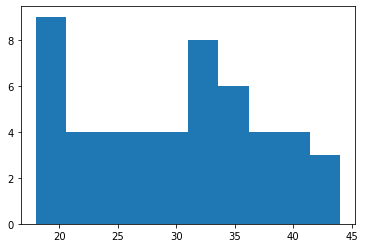

In [2]:
import matplotlib.pyplot as plt

plt.hist(sample)

plt.show()

In [3]:
from statsmodels.stats.weightstats import ztest
# statsmodels.stats.weightstats.ztest(x1, x2=None, value=0, alternative='two-sided', usevar='pooled', ddof=1.0)
# https://www.statsmodels.org/stable/generated/statsmodels.stats.weightstats.ztest.html

ztest(sample, value = 28)

# H0: mu = 28
# H1: mu != 28

# alpha we choose alpha = 0.05 therefore, our confidence is 95%

(1.5169692584650896, 0.1292744457378151)

In [4]:
ztest(sample, value = 28, alternative="larger")

# H0: mu = 28
# H1: mu > 28

# alpha we choose alpha = 0.05 therefore, our confidence is 95%

(1.5169692584650896, 0.06463722286890755)

If I have a p-value lower than 0.05, I would say:
- I have enough evidence to reject H0, there fore, I assume H1 with a confidence of 95%

If the p-value is larger than 0.05:
- I don't have enough evidence to reject H0, so we accept is true with a confidence of 95%

# Assignment II

Second graded assignment of the course. There is not only one way to do some of the sections. Feel free to add some extra sections if you consider them interesting!

1. Generate a list/array with the height of the population of Barcelona (1620343 inhab), where the mean is 173 cm and the standard deviation is 9.5 cm. Height is normally distributed.

In [5]:
from scipy.stats import norm
# generate random numbers from N(mean=173,standard deviation=9.5)
height_normal = norm.rvs(size=1620343,loc=173,scale=9.5)
print(height_normal)
type(height_normal)

[167.80946308 164.9245069  187.26954806 ... 192.80592417 162.75540654
 174.67576417]


numpy.ndarray

2. Plot the distribution of the population (not the mean)

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Height')]

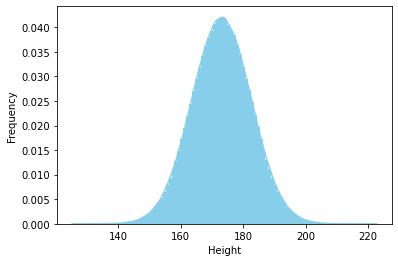

In [6]:
import seaborn as sns
ax = sns.distplot(height_normal,
                  bins=100,
                  kde=True,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Height', ylabel='Frequency')

3. How many cases are considered outliers? (we can use the definition of being above/below 1.5 x IQR, or 3 x IQR if we want to be more restrictive)

In [7]:
import numpy as np
iqr= np.quantile(height_normal, 0.75)-np.quantile(height_normal, 0.25)
print(np.quantile(height_normal, 0.75))
print(np.quantile(height_normal, 0.25))
print(iqr)

upper_15_bound= np.quantile(height_normal, 0.75)+iqr*1.5
print(upper_15_bound)
lower_15_bound= np.quantile(height_normal, 0.25)-iqr*1.5
print(lower_15_bound)

big_outliers=height_normal[height_normal>198.61733616790733]
small_outliers=height_normal[height_normal<147.39490133859866]

outliers= len(big_outliers)+len(small_outliers)
print("There are "+str(outliers)+" outliers")

179.41230759725403
166.59587668703088
12.816430910223147
198.63695396258873
147.37123032169615
There are 11424 outliers


4. Generate a sample of 50 individuals, and using the Z-test, test $H_0 = 173$ against $H_1 \neq 173$. Use a confidence of 90%, 95%, 95.5% and 99%. Do you get different conclusions?

Remember: Confidence (and significance) are arbitrary values!! You use them as a threshold, but you never see them in the functions! Is what you use to decide if the values are extreme enough given some amount of risk

In [8]:
sample50=np.random.choice(height_normal,50)
from statsmodels.stats.weightstats import ztest
print(ztest(sample50, value = 173))

(0.31857160921019473, 0.7500513851155016)


In [46]:
print("""With a p-value equal to 0.7500513851155016 I accept H0 using all the different levels of confidence because
p>alpha (90% confidence -> alpha = 0.1) in each case""")

With a p-value equal to 0.7500513851155016 I accept H0 using all the different levels of confidence because
p>alpha (90% confidence -> alpha = 0.1) in each case


4.1 Draw the Z-test for the population mean

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Height Standardized')]

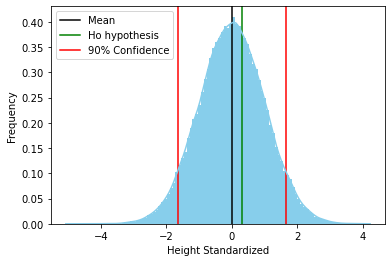

In [47]:
from scipy.stats import norm
import seaborn as sns
import matplotlib.pyplot as plt

#standard normal distribution for ztest
standardized_normal = norm.rvs(size=100000,loc=0,scale=1)


#plotting the four lines
x0 = 0
x1 = 0.31857160921019473
x2 = -1.645
x3 = 1.645

p0 = plt.axvline(x=x0,color='k',label="Mean")
p1 = plt.axvline(x=x1,color='g',label="Ho hypothesis")
p2 = plt.axvline(x=x2,color='r',label="90% Confidence")
p3 = plt.axvline(x=x3,color='r')
plt.legend(loc="upper left")


ax = sns.distplot(standardized_normal,
                  bins=100,
                  kde=True,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Height Standardized', ylabel='Frequency')

4.2 Does it change a lot if we test $H_0 = 173$ against $H_1 > 173$ ? Explain the differences

In [16]:
print(ztest(sample50, value = 173, alternative="larger"))
print("""As we can see if we transform the z-test from two-sided to one sided the p-value becomes the half:

Z-test two sided -> p-value = 0.7500513851155016
Z-test one sided -> p-value = 0.3750256925577508

This happened because in this case we calculate the area after the zvalue 0.31857160921019473, while before we were calculating
the area after that value and also the area before the zvalue -0.31857160921019473.


Anyway we still accept Ho with all the confidence intervalls proposed before.""")

(0.31857160921019473, 0.3750256925577508)
As we can see if we transform the z-test from two-sided to one sided the p-value becomes the half:

Z-test two sided -> p-value = 0.7500513851155016
Z-test one sided -> p-value = 0.3750256925577508

This happened because in this case we calculate the area after the zvalue 0.31857160921019473, while before we were calculating
the area after that value and also the area before the zvalue -0.31857160921019473.

Anyway we still accept Ho with all the confidence intervalls proposed before.


5. Now we are going to generate 10000 samples of 50 individuals. For each of them, I want to apply the previous procedure, Z-test with 90, 95, 95.5 and 99% confidence! At the end, I want to see how many times I accepted $H_0$ and how many times I rejected it (which means I assume $H_1$ is happening) for each of them. Does it fit what we should expect?

Show it graphically

In [28]:
dictionary_samples=[]
for i in range(10000):
    np.random.choice(height_normal,50)
    z, pvalue=ztest(np.random.choice(height_normal,50), value = 173)
    dictionary_samples.append(
        {
            'Z': z,
            'PVALUE': pvalue
        }
    )

In [111]:
import pandas as pd
df_samples= pd.DataFrame(dictionary_samples)
print(df_samples)

print(df_samples[df_samples["PVALUE"]<0.01].count())
print(df_samples[df_samples["PVALUE"]<0.045].count())
print(df_samples[df_samples["PVALUE"]<0.05].count())
print(df_samples[df_samples["PVALUE"]<0.1].count())
print('''The results are almost in line with the expectations:
1) With a 99% of confidence we expected 100 p-values below 0.01 and we got: 109
2) With a 95.5% of confidence we expected 450 p-values below 0.045 and we got: 516
3) With a 95% of confidence we expected 500 p-values below 0.05 and we got: 570
4) With a 90% of confidence we expected 1000 p-values below 0.1 and we got: 1077''')

             Z    PVALUE
0     1.417604  0.156306
1     1.045808  0.295650
2    -1.560067  0.118744
3    -0.591325  0.554303
4     2.246169  0.024693
...        ...       ...
9995  0.057399  0.954228
9996  1.041273  0.297749
9997 -1.788661  0.073669
9998  2.217388  0.026597
9999 -0.974927  0.329597

[10000 rows x 2 columns]
Z         109
PVALUE    109
dtype: int64
Z         516
PVALUE    516
dtype: int64
Z         570
PVALUE    570
dtype: int64
Z         1077
PVALUE    1077
dtype: int64
The results are almost in line with the expectations:
1) With a 99% of confidence we expected 100 p-values below 0.01 and we got: 109
2) With a 95.5% of confidence we expected 450 p-values below 0.045 and we got: 516
3) With a 95% of confidence we expected 500 p-values below 0.05 and we got: 570
4) With a 90% of confidence we expected 1000 p-values below 0.1 and we got: 1077


AxesSubplot(0.125,0.125;0.775x0.755)


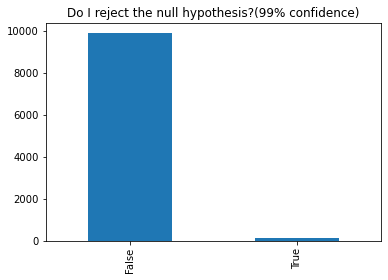

In [112]:
df_samples["Ho_rejected_99"]=(df_samples["PVALUE"]<0.01)
df_samples["Ho_rejected_95.5"]=(df_samples["PVALUE"]<0.045)
df_samples["Ho_rejected_95"]=(df_samples["PVALUE"]<0.05)
df_samples["Ho_rejected_90"]=(df_samples["PVALUE"]<0.1)

import matplotlib.pyplot as plt

df_samples.drop(['Z','PVALUE'], axis=1, inplace=True)

print(df_samples["Ho_rejected_99"].value_counts().plot.bar(title="Do I reject the null hypothesis?(99% confidence)"))

AxesSubplot(0.125,0.125;0.775x0.755)


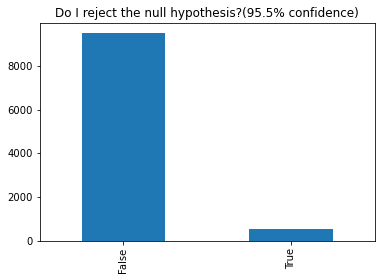

In [113]:
print(df_samples["Ho_rejected_95.5"].value_counts().plot.bar(title="Do I reject the null hypothesis?(95.5% confidence)"))

AxesSubplot(0.125,0.125;0.775x0.755)


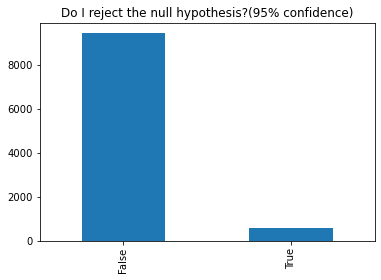

In [114]:
print(df_samples["Ho_rejected_95"].value_counts().plot.bar(title="Do I reject the null hypothesis?(95% confidence)"))

AxesSubplot(0.125,0.125;0.775x0.755)


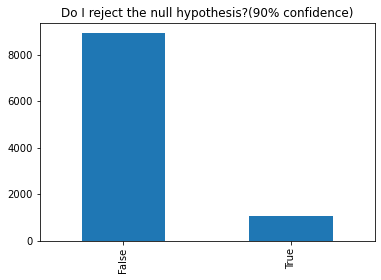

In [115]:
print(df_samples["Ho_rejected_90"].value_counts().plot.bar(title="Do I reject the null hypothesis?(90% confidence)"))

6.  Replicate the previous point, testing $H_0 = 180$ against $H_1 \neq 180$. How many times have you accepted $H_0$? Can you link these results with the errors of type I and II?

In [40]:
dictionary_samples2=[]
for i in range(10000):
    np.random.choice(height_normal,50)
    z, pvalue=ztest(np.random.choice(height_normal,50), value = 180)
    dictionary_samples2.append(
        {
            'Z': z,
            'PVALUE': pvalue
        }
    )

In [45]:
import pandas as pd
df_samples2= pd.DataFrame(dictionary_samples2)
print(df_samples2)

print(df_samples2[df_samples2["PVALUE"]<0.01].count())
print(df_samples2[df_samples2["PVALUE"]<0.045].count())
print(df_samples2[df_samples2["PVALUE"]<0.05].count())
print(df_samples2[df_samples2["PVALUE"]<0.1].count())
print('''These results underline how in some cases we can accept an Ho hypothesis that is false(type II error),
for instance with a 99% level of confidence we accept 45 times over 10000 the null hypothesis that is false,
so in this trial we accept in 0.45% of the samples a false null hypothesis.
The probability beta to have a type II error decreases when the confidence level decreases as we can see above.''')

             Z        PVALUE
0    -3.358239  7.844071e-04
1    -5.202677  1.964383e-07
2    -4.917625  8.760047e-07
3    -3.278910  1.042089e-03
4    -5.826947  5.645067e-09
...        ...           ...
9995 -4.830019  1.365200e-06
9996 -6.051163  1.438038e-09
9997 -4.328413  1.501877e-05
9998 -4.800452  1.583077e-06
9999 -3.764822  1.666681e-04

[10000 rows x 2 columns]
Z         9955
PVALUE    9955
dtype: int64
Z         9992
PVALUE    9992
dtype: int64
Z         9992
PVALUE    9992
dtype: int64
Z         9998
PVALUE    9998
dtype: int64
These results underline how in some cases we can accept an Ho hypothesis that is false(type II error),
for instance with a 99% level of confidence we accept 45 times over 10000 the null hypothesis that is false,
so in this trial we accept in 0.45% of the samples a false null hypothesis.
The probability beta to have a type II error decreases when the confidence level decreases as we can see above.


AxesSubplot(0.125,0.125;0.775x0.755)


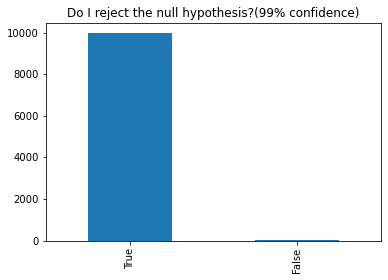

In [116]:
df_samples2["Ho_rejected_99"]=(df_samples2["PVALUE"]<0.01)
df_samples2["Ho_rejected_95.5"]=(df_samples2["PVALUE"]<0.045)
df_samples2["Ho_rejected_95"]=(df_samples2["PVALUE"]<0.05)
df_samples2["Ho_rejected_90"]=(df_samples2["PVALUE"]<0.1)

import matplotlib.pyplot as plt

df_samples2.drop(['Z','PVALUE'], axis=1, inplace=True)

print(df_samples2["Ho_rejected_99"].value_counts().plot.bar(title="Do I reject the null hypothesis?(99% confidence)"))

AxesSubplot(0.125,0.125;0.775x0.755)


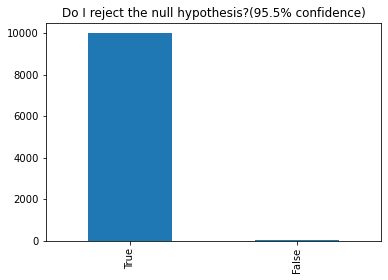

In [119]:
print(df_samples2["Ho_rejected_95.5"].value_counts().plot.bar(title="Do I reject the null hypothesis?(95.5% confidence)"))

AxesSubplot(0.125,0.125;0.775x0.755)


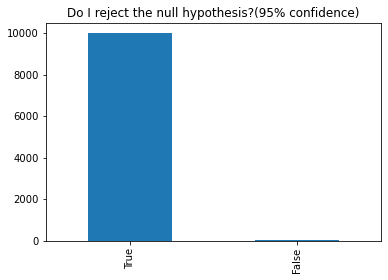

In [120]:
print(df_samples2["Ho_rejected_95"].value_counts().plot.bar(title="Do I reject the null hypothesis?(95% confidence)"))

AxesSubplot(0.125,0.125;0.775x0.755)


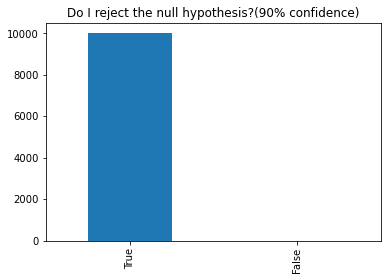

In [121]:
print(df_samples2["Ho_rejected_90"].value_counts().plot.bar(title="Do I reject the null hypothesis?(90% confidence)"))